In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n

In [12]:
recibos= pd.read_csv("recibos_facts_debitos.csv")
recibos

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41329,41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,41333,REC X0099-00006794,2022-09-04,NaN,NaN


In [4]:
recibos=recibos.drop(recibos.columns[0], axis='columns')
recibos

,Nro Comprobante,Fecha,Total,ID_cliente
0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...
41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,REC X0099-00006794,2022-09-04,NaN,NaN


In [46]:
# Cantidad de rows y columnas.

In [57]:
recibos.shape

(41334, 5)

In [48]:
# Clases de datos

In [58]:
recibos.dtypes

Unnamed: 0           int64
Nro Comprobante     object
Fecha               object
Total              float64
ID_cliente         float64
dtype: object

In [50]:
#Muestre la cantidad de faltantes por columnas


In [59]:
recibos.isna().sum()

Unnamed: 0         0
Nro Comprobante    0
Fecha              0
Total              3
ID_cliente         4
dtype: int64

In [52]:
#Que porcentaje de faltantes hay
#hay un porcentaje de 0,1%

In [53]:
7/len(recibos)*100


0.016935210722407702

In [54]:
#Muestre las filas con datos faltantes


In [10]:
filtro = recibos.isnull()
filtro

,Nro Comprobante,Fecha,Total,ID_cliente
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
41329,False,False,False,False
41330,False,False,True,True
41331,False,False,True,True
41332,False,False,True,True


In [ ]:
#Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?
#al faltar los ids, borro todos los registros con nans

In [62]:
recibos=recibos.dropna()
recibos

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0
41328,41328,REC X0099-00006794,2018-09-04,2446.00,12.0


In [66]:
recibos.describe()

,Unnamed: 0,Total,ID_cliente
count,41330.000000,41330.000000,41330.000000
mean,20664.500000,1060.510129,483.246141
std,11931.087649,1300.033900,274.816781
min,0.000000,0.000000,0.000000
25%,10332.250000,331.430000,242.000000
50%,20664.500000,998.980000,476.000000
75%,30996.750000,1000.000000,733.000000
max,41329.000000,56000.000000,964.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total'>

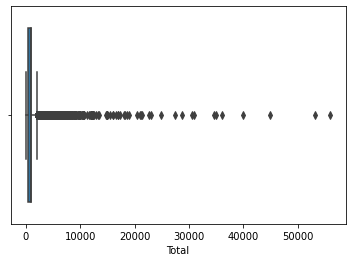

In [64]:
sns.boxplot(recibos.Total)
#con este grafico podemos detectar un outlier

In [67]:
#Cambie el nombre de las columnas a "nro_comprobante","fecha","monto","id_cliente"
recibos.columns

Index(['Unnamed: 0', 'Nro Comprobante', 'Fecha', 'Total', 'ID_cliente'], dtype='object')

In [72]:
recibos.rename(columns = {'Nro Comprobante':'nro_comprobante', 'Fecha':'fecha',"ID_cliente":"id_cliente","Total":"monto"}, inplace = True)

In [ ]:
#cuanto clientes unicos hay

In [73]:
recibos.id_cliente.nunique()

965

In [ ]:
#Cree una nueva columna que llamada “tipo” que consista en agarrar la columna
“nro_comprobante” y separar el primer string dejando sólo si es recibo, factura, nota
de débito o nota de crédito.

In [78]:
nueva=recibos.nro_comprobante.apply(lambda x:x.split(" ")[0])

In [80]:
recibos["tipo"]=nueva
recibos

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC
...,...,...,...,...,...,...
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC
41328,41328,REC X0099-00006794,2018-09-04,2446.00,12.0,REC


In [ ]:
#Cuantos registros se tienen de cada uno?

In [87]:
cantidad=recibos.tipo.value_counts()
cantidad

N/D    15762
REC    12207
FAC    10974
N/C     2387
Name: nro_comprobante, dtype: int64

In [ ]:
#monto total de los recibo,monto total de las notas de débito,monto total de las notas de crédito ymonto total de lo facturado

In [88]:
recibos.groupby(recibos.tipo)["monto"].sum()

nro_comprobante
FAC     7598706.46
N/C     1335102.12
N/D     8204046.41
REC    26693028.63
Name: monto, dtype: float64

In [90]:
recibos.fecha=pd.to_datetime(recibos.fecha)

In [ ]:
#Crear la columna año y mes

In [106]:
recibos["year_month"]=pd.DatetimeIndex(recibos.fecha).to_period("m")
recibos

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo,year_month
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC,2015-12
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC,2015-12
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC,2015-12
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC,2015-12
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC,2015-12
...,...,...,...,...,...,...,...
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC,2018-09
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC,2018-09
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC,2018-09
41328,41328,REC X0099-00006794,2018-09-04,2446.00,12.0,REC,2018-09


In [ ]:
#sumar sólo lo cobrado (REC y N/D) y mostrar una tabla que tenga como indice fecha(año-mes) y columna monto_cobrado, cantidad_recibos. (group by)


In [128]:
df_filtrado = recibos[(recibos.tipo == "REC") | (recibos.tipo =="N/D")]


In [129]:
recibos_filtrado=df_filtrado.groupby('year_month')["monto"].sum() 
recibos_filtrado

year_month
2015-12      3339.00
2016-01     23217.27
2016-02     87138.09
2016-03    193843.65
2016-04    208850.76
             ...    
2022-02    177288.65
2022-03    245495.68
2022-04    145510.59
2022-05     87518.58
2022-06     81386.59
Freq: M, Name: monto, Length: 79, dtype: float64

In [18]:
#¿Cuantos valores hay mayores a 60000?
(recibos.Total>60000).sum()

1

In [143]:
filtro= recibos.monto > 60000
recibos[filtro]

0        False
1        False
2        False
3        False
4        False
         ...  
41325    False
41326    False
41327    False
41328    False
41329    False
Name: monto, Length: 41330, dtype: bool

In [145]:
#Cual es el valor máximo? ¿Debería eliminarlo? ¿Por qué?
recibos.monto.max()

56000.0

In [ ]:
#Hacer un lineplot del total cobrad

<AxesSubplot:xlabel='year_month'>

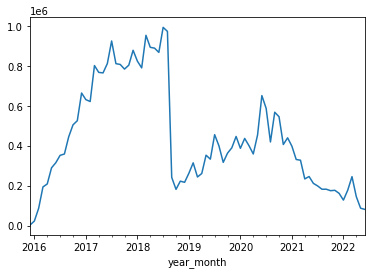

In [131]:
recibos_filtrado.plot()

In [136]:
clientes_unicos= recibos.groupby(by=["year_month","id_cliente"])["monto"].sum()
clientes_unicos

year_month  id_cliente
2015-12     70.0          1654.00
            123.0         2716.62
            675.0            6.00
2016-01     20.0          2854.23
            62.0            14.90
                           ...   
2022-06     695.0         4999.89
            769.0         6126.86
            840.0         6499.87
            853.0         1999.95
            926.0         6299.87
Name: monto, Length: 15606, dtype: float64

<AxesSubplot:xlabel='year_month,id_cliente'>

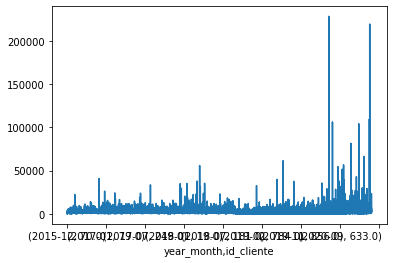

In [140]:
clientes_unicos.plot.line()